In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *

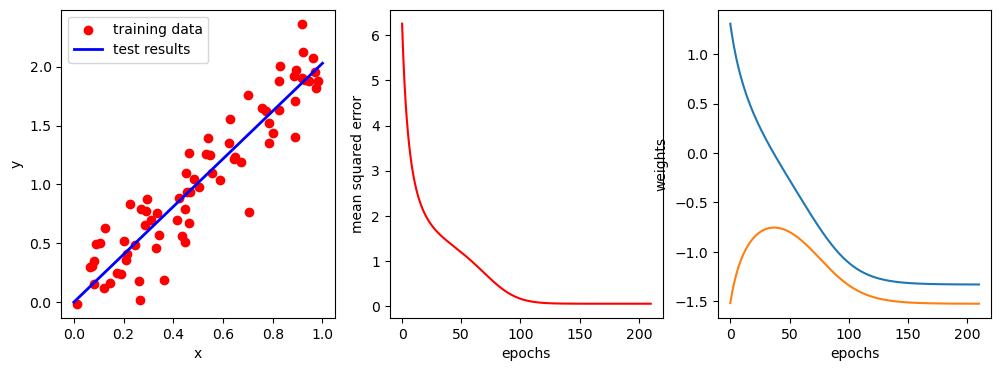

In [2]:
class ShallowNarrowExercise:
  """
  Shallow and narrow (one neuron per layer) linear neural network
  """

  def __init__(self, init_weights):
    """
    Initialize parameters of ShallowNarrow Net

    Args:
      init_weights: list
        Initial weights

    Returns:
      Nothing
    """
    assert isinstance(init_weights, (list, np.ndarray, tuple))
    assert len(init_weights) == 2
    self.w1 = init_weights[0]
    self.w2 = init_weights[1]


  def forward(self, x):
    """
    The forward pass through netwrok y = x * w1 * w2

    Args:
      x: np.ndarray
        Features (inputs) to neural net

    Returns:
      y: np.ndarray
        Neural network output (predictions)
    """
    #################################################
    ## Implement the forward pass to calculate prediction
    ## Note that prediction is not the loss
    # Complete the function and remove or comment the line below
    #################################################
    y = self.w1*self.w2*x
    return y


  def dloss_dw(self, x, y_true):
    """
    Gradient of loss with respect to weights

    Args:
      x: np.ndarray
        Features (inputs) to neural net
      y_true: np.ndarray
        True labels

    Returns:
      dloss_dw1: float
        Mean gradient of loss with respect to w1
      dloss_dw2: float
        Mean gradient of loss with respect to w2
    """
    assert x.shape == y_true.shape
    #################################################
    ## Implement the gradient computation function
    # Complete the function and remove or comment the line below
    #################################################
    # why the mean here? average over all x and y values because... you only have one w1 and w2 value and you're going in the direction
    # of steepest descent which will be given by the average of the descent (imagine vector arrows) of all x and y values.
    dloss_dw1 = (-2*self.w2*x*(y_true-self.w1*self.w2*x)).mean()
    dloss_dw2 = (-2*self.w1*x*(y_true-self.w1*self.w2*x)).mean()
    return dloss_dw1, dloss_dw2


  def train(self, x, y_true, lr, n_ep):
    """
    Training with Gradient descent algorithm

    Args:
      x: np.ndarray
        Features (inputs) to neural net
      y_true: np.ndarray
        True labels
      lr: float
        Learning rate
      n_ep: int
        Number of epochs (training iterations)

    Returns:
      loss_records: list
        Training loss records
      weight_records: list
        Training weight records (evolution of weights)
    """
    assert x.shape == y_true.shape

    loss_records = np.empty(n_ep)  # Pre allocation of loss records
    weight_records = np.empty((n_ep, 2))  # Pre allocation of weight records

    for i in range(n_ep):
      y_prediction = self.forward(x)
      loss_records[i] = loss(y_prediction, y_true)
      dloss_dw1, dloss_dw2 = self.dloss_dw(x, y_true)
      #################################################
      ## Implement the gradient descent step
      # Complete the function and remove or comment the line below
      #################################################
      self.w1 -= lr*dloss_dw1
      self.w2 -= lr*dloss_dw2
      weight_records[i] = [self.w1, self.w2]

    return loss_records, weight_records


def loss(y_prediction, y_true):
  """
  Mean squared error

  Args:
    y_prediction: np.ndarray
      Model output (prediction)
    y_true: np.ndarray
      True label

  Returns:
    mse: np.ndarray
      Mean squared error loss
  """
  assert y_prediction.shape == y_true.shape
  #################################################
  ## Implement the MEAN squared error
  # Complete the function and remove or comment the line below
  #################################################
  mse = np.mean((y_prediction-y_true)**2)
  return mse



#set_seed(seed=SEED)
n_epochs = 211
learning_rate = 0.02
initial_weights = [1.4, -1.6]
x_train, y_train = gen_samples(n=73, a=2.0, sigma=0.2)
x_eval = np.linspace(0.0, 1.0, 37, endpoint=True)
## Uncomment to run
sn_model = ShallowNarrowExercise(initial_weights)
loss_log, weight_log = sn_model.train(x_train, y_train, learning_rate, n_epochs)
y_eval = sn_model.forward(x_eval)
plot_x_y_(x_train, y_train, x_eval, y_eval, loss_log, weight_log)

### Explore effect of hyperparameters with widgets

In [ ]:
from ipywidgets import interact, IntSlider


def depth_widget(depth):
  """
  Simulate parameter in widget
  exploring impact of depth on the training curve
  (loss evolution) of a deep but narrow neural network.

  Args:
    depth: int
      Specifies depth of network

  Returns:
    Nothing
  """
  if depth == 0:
    depth_lr_init_interplay(depth, 0.02, 0.9)
  else:
    depth_lr_init_interplay(depth, 0.01, 0.9)

_ = interact(depth_widget,
    depth = IntSlider(min=0, max=51,
                      step=5, value=0,
                      continuous_update=False))

interactive(children=(IntSlider(value=0, continuous_update=False, description='depth', max=51, step=5), Output…

#### From playing with widgets in collab notebook:

- Bigger learning rates makes the network learn faster.
- At a certain point, the MSE starts to oscillate, because the network jumps across minima.

- Deeper networks needs more epochs (more parameters to train)
- Deeper networks start to oscillate at lower learning rates - their optimal learning rate is lower

- Initialization matters. Because of the chain rule, parameters (weights) are multiplied together in the total transfer function of the network. Too small initial weights lead to vanishing gradients, too high initial weights lead to exploding gradients. Initial values close to 1 (slightly above) are optimal.

#### From Linear Deep Learning Collab Notebook

- It arrives at the same result as basic linear regression, but take different path to get there.
  - Linear deep learning changes the parametrization.
  - With a shallow network you get quick convergence.
- With deep network you get saddle points during learning as certain features are learned hierarchically through network
  - First class separation (animals vs plants) learned first - first principal component in SVD. Second class seperation (fish vs birds, flowers vs trees) learned second - second PC in SVD. Etc. For the learning of each class you get a saddle point
- Advantage of deep learning: It can get passed illusory correlations.
  - First, the network thinks that a shark has bones, because the other animals (within class - initial overgeneralization) have bones. But with more layers, it gets passed it and realizes that sharks are unique in not having bones even though other animals have them.